#Segregation Of Tweets In Twitter Using Sentiment- Based Machine Learning Technique

In this notebook, a tweets dataset (train, valid) is preprocessed, analyzed, and used for training several ML and DL sentiment classification models.

#1. Imports and Dataset

The training dataset is imported, preprocessed and analyzed in this section.

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CodeWorks/Tweetset/twitter_training.csv")

In [ ]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


##a. Setting Proper Column Names

In [ ]:
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

In [ ]:
df.head()

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.describe()

,ID
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
df['Sentiment'].value_counts()

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

##b. Removing Unnecessary characters/words from Tweets

In [ ]:
# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Replace newline characters and following text until space
    text = re.sub(r'\n[\w\']*',' ',text)
    # Remove leading, trailing spaces
    text = text.strip()
    return text

# Apply function to text column
df['Tweet'] = df['Tweet'].apply(lambda x: clean_text(x) if isinstance(x, str) else x)


In [ ]:
df['Tweet'].head()

0    i am coming to the borders and i will kill you...
1    im getting on borderlands and i will kill you all
2    im coming on borderlands and i will murder you...
3    im getting on borderlands  and i will murder y...
4    im getting into borderlands and i can murder y...
Name: Tweet, dtype: object

## c. Removing Nulls

In [ ]:
df.isnull().values.sum()

686

In [ ]:
df_cln = df.dropna()

In [ ]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73995 non-null  int64 
 1   Topic      73995 non-null  object
 2   Sentiment  73995 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


##d.Mapping Sentiments to Numerical Values

In [ ]:
encoder = LabelEncoder()
df_cln['Sentiment'] = encoder.fit_transform(df_cln['Sentiment'])

<ipython-input-15-7a4d317c7f43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['Sentiment'] = encoder.fit_transform(df_cln['Sentiment'])


In [ ]:
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(mapping)

{'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}


In [ ]:
df_cln.head()

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,3,i am coming to the borders and i will kill you...
1,2401,Borderlands,3,im getting on borderlands and i will kill you all
2,2401,Borderlands,3,im coming on borderlands and i will murder you...
3,2401,Borderlands,3,im getting on borderlands and i will murder y...
4,2401,Borderlands,3,im getting into borderlands and i can murder y...


#2. Exploratory Data Analysis

## a. Distribution of Sentiments

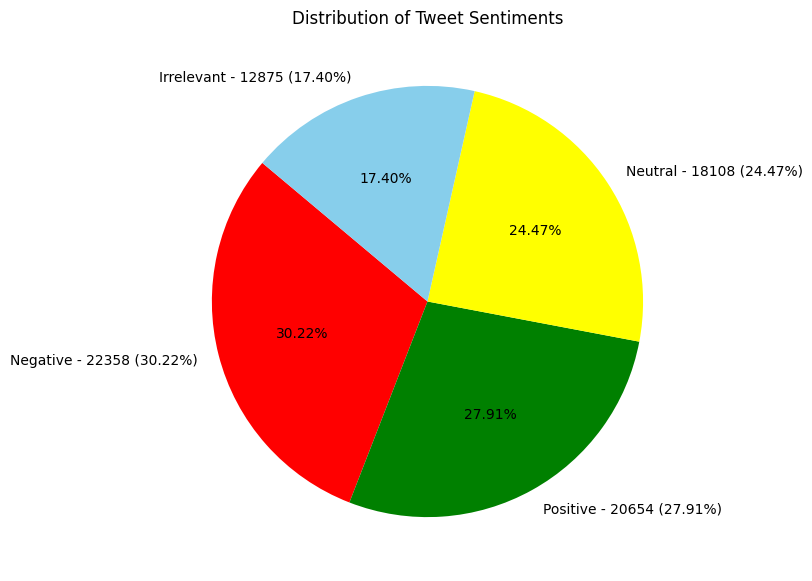

In [ ]:
sentiment_counts = df_cln['Sentiment'].value_counts()
sentiment_percent = 100 * sentiment_counts / sentiment_counts.sum()
labels = [f'{sentiment} - {count} ({percent:.2f}%)' for sentiment, count, percent in zip(sentiment_counts.index.map({0: 'Irrelevant', 1: 'Negative', 2: 'Neutral', 3: 'Positive'}), sentiment_counts, sentiment_percent)]

plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts, labels=labels, autopct='%1.2f%%', startangle=140, colors=['red', 'green', 'yellow', 'skyblue'])
plt.title('Distribution of Tweet Sentiments')
plt.show()

## b. Topics

In [ ]:
total_topics = df_cln['Topic'].nunique()
print("Total Topics", total_topics)
df_cln['Topic'].value_counts()

Total Topics 32


MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                       

## c. Word Count Distribution All Data / Per Sentiment

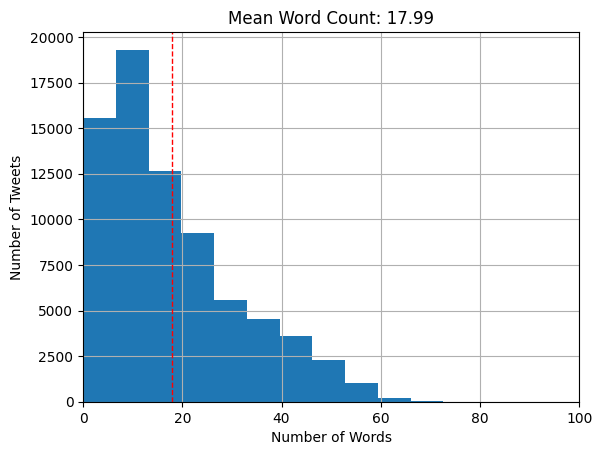

count    73995.000000
mean        17.988067
std         13.633577
min          0.000000
25%          8.000000
50%         14.000000
75%         25.000000
max        198.000000
Name: Tweet, dtype: float64


In [ ]:
mean_length = df_cln['Tweet'].str.split().str.len().mean()

df_cln['Tweet'].str.split().str.len().hist(bins=30)
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.title(f'Mean Word Count: {mean_length:.2f}')
plt.xlim(0, 100)  # Limiting the x-axis
plt.show()
print(df_cln['Tweet'].str.split().str.len().describe())

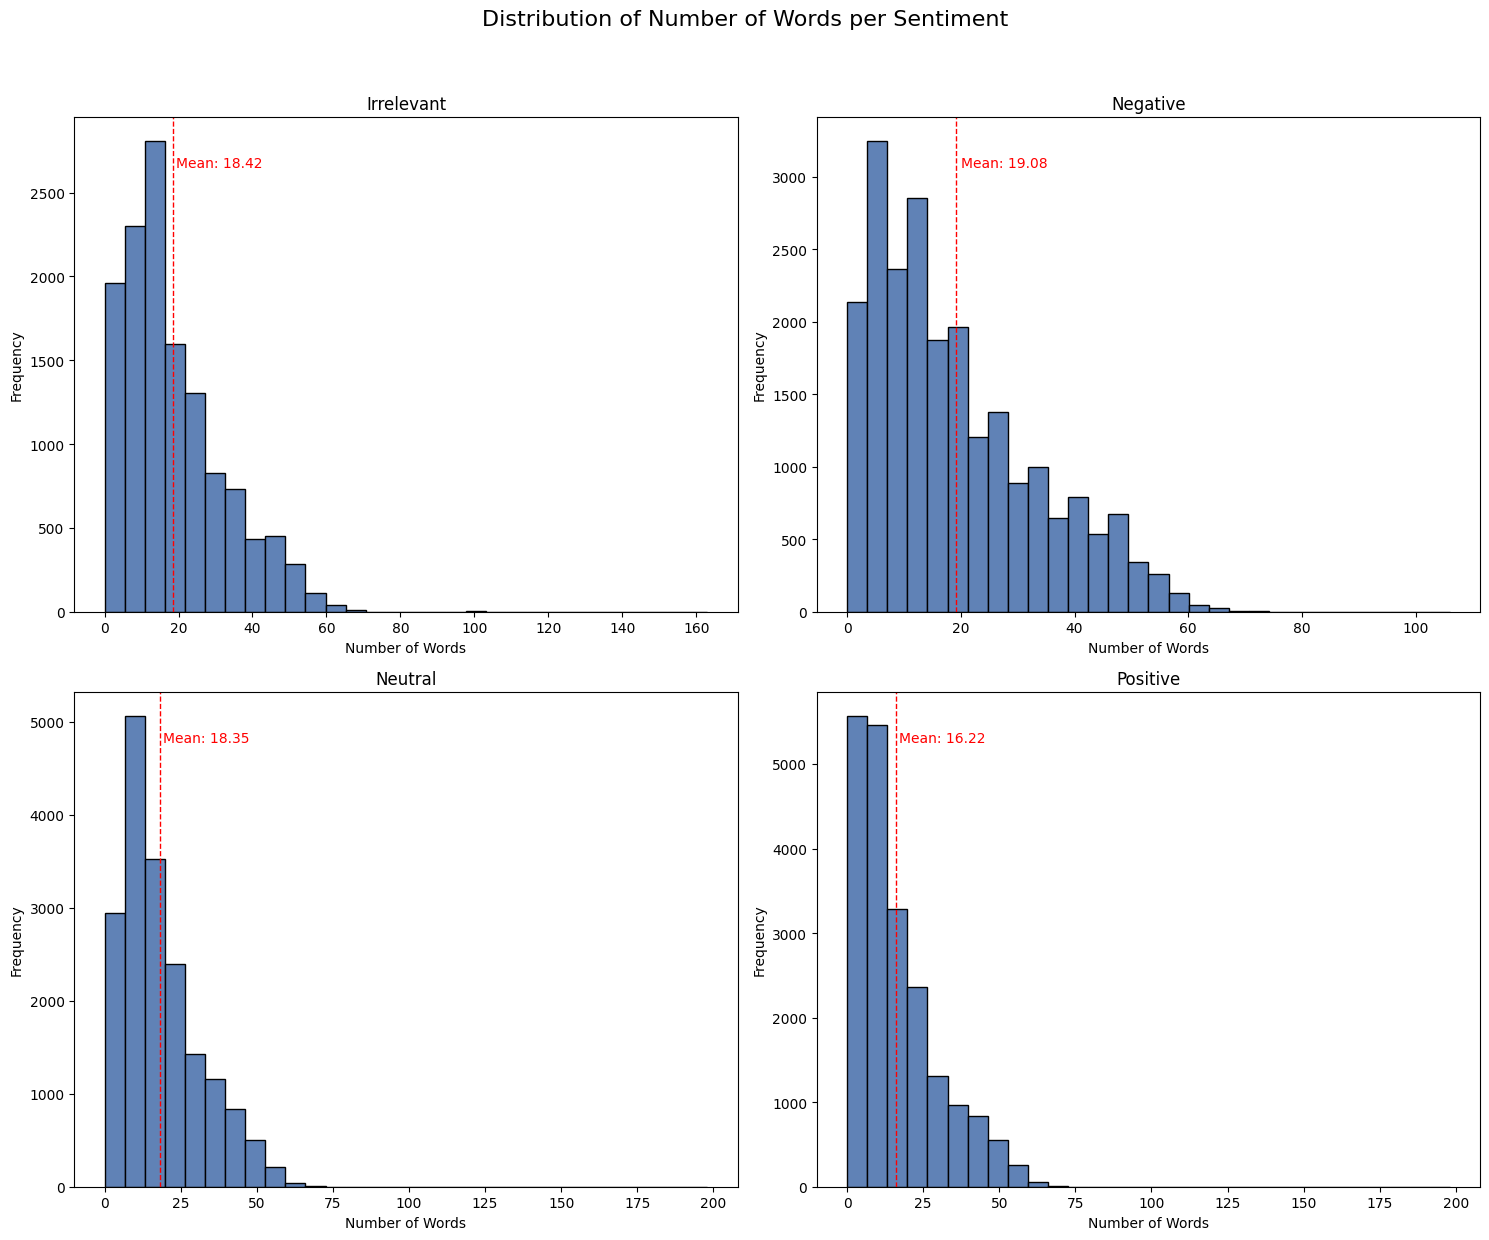

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
sentiments = ['Irrelevant', 'Negative', 'Neutral', 'Positive']

for i, sentiment in enumerate(sentiments):
    ax = axes[i//2, i%2]
    mask = df_cln['Sentiment'] == sentiments.index(sentiment)

    # Compute the word counts on the fly
    word_counts = df_cln[mask]['Tweet'].apply(lambda x: len(str(x).split()))

    # Calculate mean for the current sentiment
    mean_val = word_counts.mean()

    ax.hist(word_counts, bins=30, color='#6082B6', edgecolor='black')
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=1)  # Adding a vertical dashed line at the mean value
    ax.text(mean_val+1, ax.get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}', color='red')  # Displaying the mean value

    ax.set_title(sentiment)
    ax.set_xlabel('Number of Words')
    ax.set_ylabel('Frequency')

# Setting the overall title
fig.suptitle('Distribution of Number of Words per Sentiment', fontsize=16, y=1.03)

plt.tight_layout()
plt.show()


## d. Word Cloud Per Sentiment

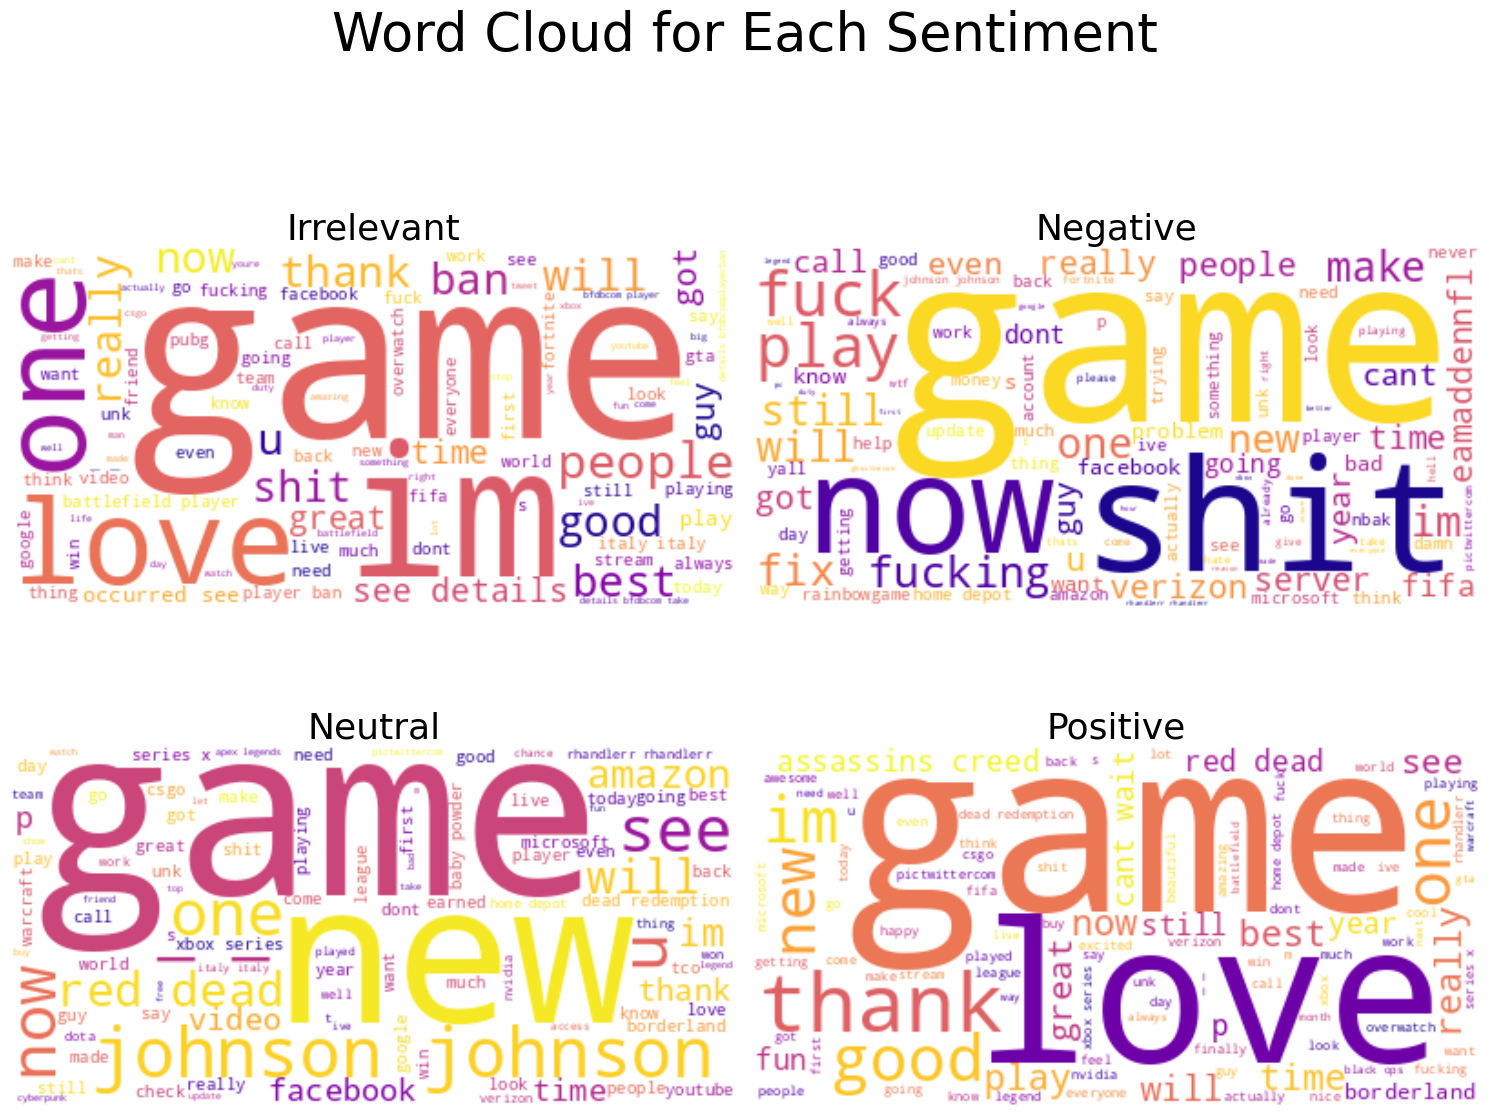

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
sentiments = ['Irrelevant', 'Negative', 'Neutral', 'Positive']

for i, sentiment in enumerate(sentiments):
    ax = axes[i//2, i%2]
    mask = df_cln['Sentiment'] == sentiments.index(sentiment)

    # Combine all tweets of the current sentiment into a single string
    combined_text = ' '.join(df_cln[mask]['Tweet'].tolist())

    # Generate the word cloud
    wordcloud = WordCloud(max_words=100, background_color='white', colormap='plasma').generate(combined_text)

    # Plotting the word cloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(sentiment, fontsize=26)

# Setting the overall title
fig.suptitle('Word Cloud for Each Sentiment', fontsize=38, y=1.03)

plt.tight_layout()
plt.show()

## e. Top Sentiment in each topic

In [ ]:
sentiment_counts = df_cln.groupby(['Topic', 'Sentiment']).size().unstack().reset_index()
sentiment_counts['Dominant_Sentiment'] = sentiment_counts.iloc[:, 1:].idxmax(axis=1)
grouped_topics = sentiment_counts.groupby('Dominant_Sentiment')['Topic'].apply(list).reset_index()

sentiment_dict = {0: 'Irrelevant', 1: 'Negative', 2: 'Neutral', 3: 'Positive'}
for index, row in grouped_topics.iterrows():
    print(f"\nDominant Sentiment: {sentiment_dict[row['Dominant_Sentiment']]}")
    print(", ".join(row['Topic']))


Dominant Sentiment: Irrelevant
Battlefield, Fortnite, GrandTheftAuto(GTA), PlayerUnknownsBattlegrounds(PUBG)

Dominant Sentiment: Negative
CallOfDuty, Dota2, FIFA, HomeDepot, MaddenNFL, NBA2K, TomClancysGhostRecon, TomClancysRainbowSix, Verizon

Dominant Sentiment: Neutral
Amazon, ApexLegends, Facebook, Google, LeagueOfLegends, Microsoft, Nvidia, WorldOfCraft, johnson&johnson

Dominant Sentiment: Positive
AssassinsCreed, Borderlands, CS-GO, CallOfDutyBlackopsColdWar, Cyberpunk2077, Hearthstone, Overwatch, PlayStation5(PS5), RedDeadRedemption(RDR), Xbox(Xseries)


##f. Sentiments Per Topic

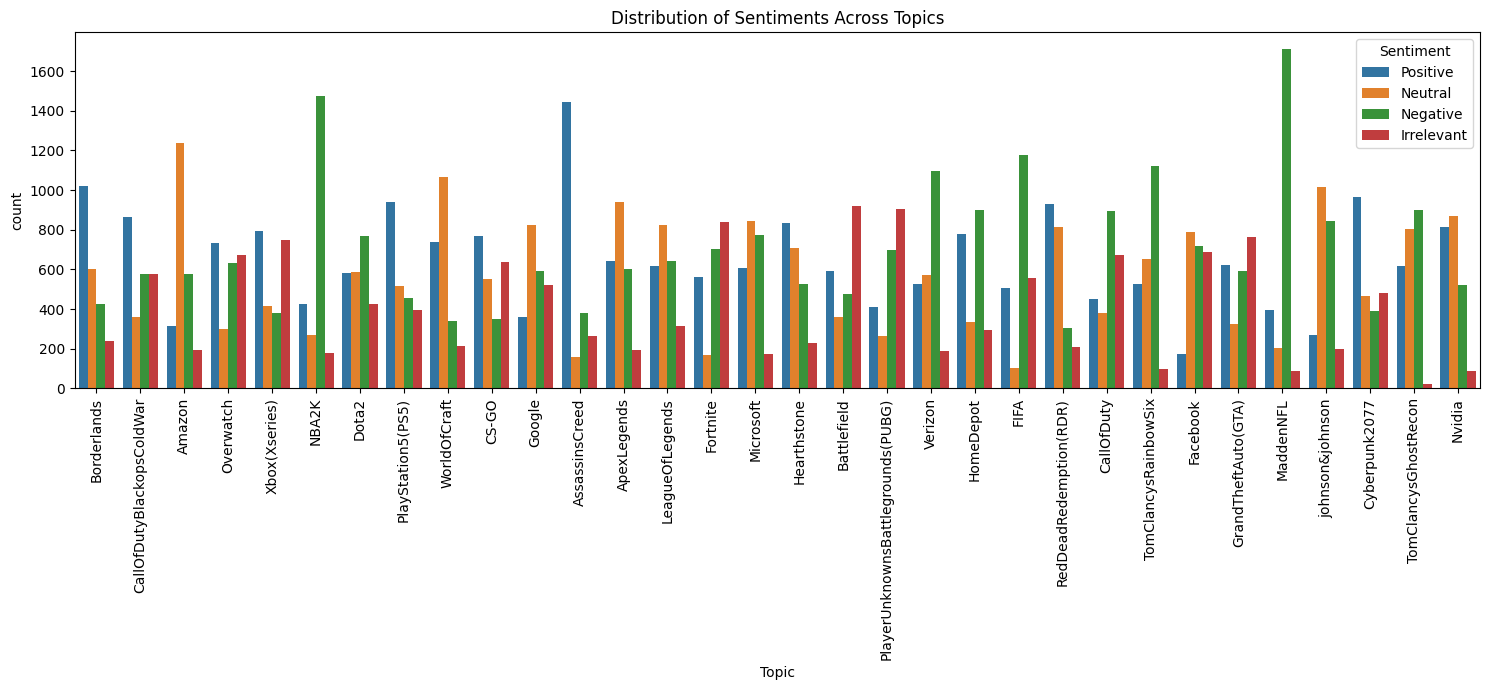

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Topic', hue='Sentiment')
plt.title('Distribution of Sentiments Across Topics')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## g. Topic(s) with Most Positive, Negative, Neutral and Irrelevant Tweets

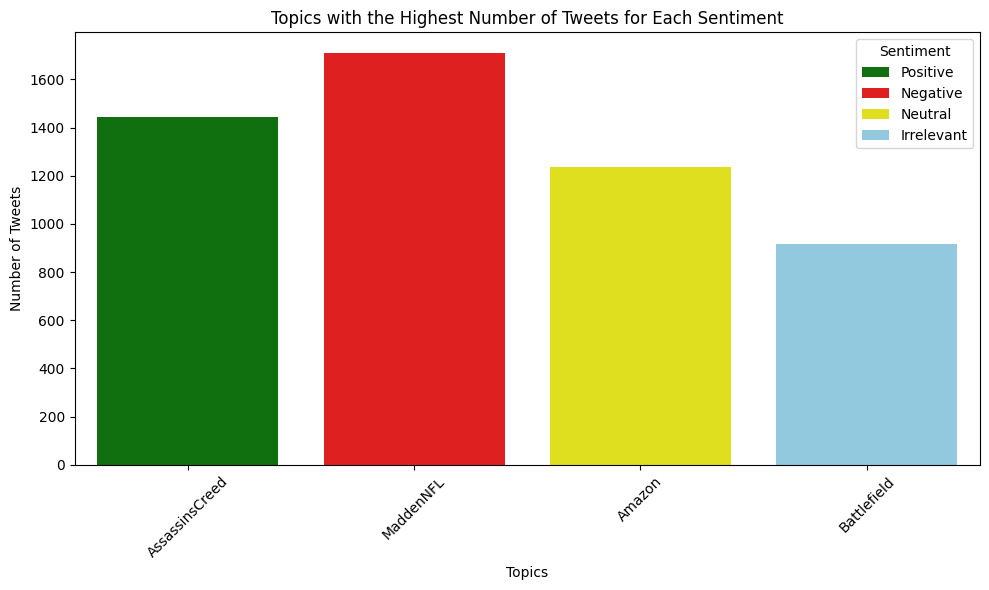

In [ ]:
# Custom color palette
palette = {
    "Positive": "green",
    "Negative": "red",
    "Neutral": "yellow",
    "Irrelevant": "skyblue"
}

grouped_data = df.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)
ordered_sentiments = ["Positive", "Negative", "Neutral", "Irrelevant"]
sorted_topics = grouped_data[ordered_sentiments].idxmax()
counts = [grouped_data.loc[topic, sentiment] for sentiment, topic in zip(ordered_sentiments, sorted_topics)]
plt.figure(figsize=(10,6))

# Apply custom palette and order
sns.barplot(x=sorted_topics.values, y=counts, hue=ordered_sentiments, dodge=False, palette=palette)

plt.ylabel('Number of Tweets')
plt.xlabel('Topics')
plt.title('Topics with the Highest Number of Tweets for Each Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Sentiment', loc='upper right')
plt.show()

#3. Loading Validation Dataset

In [ ]:
df_vld = pd.read_csv("/content/drive/MyDrive/CodeWorks/Tweetset/twitter_validation.csv")

In [ ]:
df_vld.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

In [ ]:
df_vld.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

In [ ]:
df_vld.isnull().values.sum()
df_vld= df_vld.dropna()

In [ ]:
encoder = LabelEncoder()
df_vld['Sentiment'] = encoder.fit_transform(df_vld['Sentiment'])
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(mapping)

{'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}


##a. Preprocessing Validation Dataset

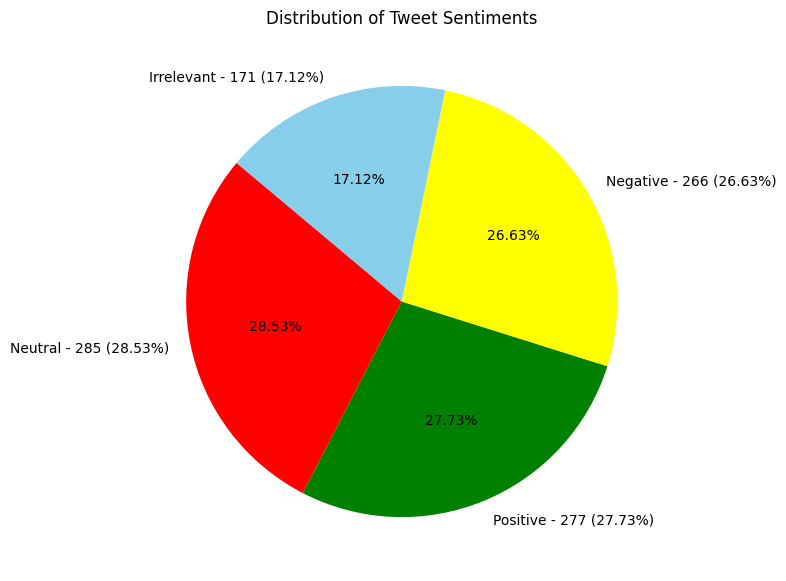

In [ ]:
sentiment_counts = df_vld['Sentiment'].value_counts()
sentiment_percent = 100 * sentiment_counts / sentiment_counts.sum()
labels = [f'{sentiment} - {count} ({percent:.2f}%)' for sentiment, count, percent in zip(sentiment_counts.index.map({0: 'Irrelevant', 1: 'Negative', 2: 'Neutral', 3: 'Positive'}), sentiment_counts, sentiment_percent)]

plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts, labels=labels, autopct='%1.2f%%', startangle=140, colors=['red', 'green', 'yellow', 'skyblue'])
plt.title('Distribution of Tweet Sentiments')
plt.show()

In [ ]:
df_vld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         999 non-null    int64 
 1   Topic      999 non-null    object
 2   Sentiment  999 non-null    int64 
 3   Tweet      999 non-null    object
dtypes: int64(2), object(2)
memory usage: 31.3+ KB


##b. Dropping Irrelevant class

In [ ]:
df_trn = df_cln[df_cln['Sentiment'] != 0]
df_trn.reset_index(drop=True, inplace=True)
print(mapping)
df_trn['Sentiment'].value_counts()

{'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}


1    22358
3    20654
2    18108
Name: Sentiment, dtype: int64

In [ ]:
# Drop rows with 'Irrelevant' sentiment
df_vld = df_vld[df_vld['Sentiment'] != 0]
df_vld.reset_index(drop=True, inplace=True)
print(mapping)
df_vld['Sentiment'].value_counts()

{'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}


2    285
3    277
1    266
Name: Sentiment, dtype: int64

#4. Model Training

##a. Tokenization

In [ ]:
df_trn['tokens'] = df_trn['Tweet'].apply(lambda x: x.split())
df_vld['tokens'] = df_vld['Tweet'].apply(lambda x: x.split())

<ipython-input-35-2135bb94a4cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trn['tokens'] = df_trn['Tweet'].apply(lambda x: x.split())


##b. Splitting Attribute, Label

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform
X_trn = vectorizer.fit_transform(df_trn['Tweet'])

# Transform the validation data
X_vld = vectorizer.transform(df_vld['Tweet'])

In [ ]:
y_trn = df_trn['Sentiment']
y_vld = df_vld['Sentiment']

In [ ]:
X_trn.shape

(61120, 32605)

In [ ]:
X_vld.shape

(828, 32605)

## Model1- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_trn, y_trn)

# Predict on validation data
y_pred_logistic = logistic_model.predict(X_vld)

# Evaluation
accuracy_logistic = accuracy_score(y_vld, y_pred_logistic)
report_logistic = classification_report(y_vld, y_pred_logistic)

In [ ]:
print(classification_report(y_vld, y_pred_logistic))

              precision    recall  f1-score   support

           1       0.91      0.93      0.92       266
           2       0.90      0.92      0.91       285
           3       0.93      0.90      0.91       277

    accuracy                           0.91       828
   macro avg       0.91      0.91      0.91       828
weighted avg       0.91      0.91      0.91       828



## Model2- Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC()
svm_model.fit(X_trn, y_trn)

# Predict on validation data
y_pred_svm = svm_model.predict(X_vld)

# Evaluation
accuracy_svm = accuracy_score(y_vld, y_pred_svm)
report_svm = classification_report(y_vld, y_pred_svm)

In [ ]:
print(classification_report(y_vld, y_pred_svm))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       266
           2       0.98      0.99      0.98       285
           3       0.99      0.98      0.98       277

    accuracy                           0.98       828
   macro avg       0.98      0.98      0.98       828
weighted avg       0.98      0.98      0.98       828



## Model3- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_trn, y_trn)

# Predict on validation data
y_pred_rf = rf_model.predict(X_vld)

# Evaluation
accuracy_rf = accuracy_score(y_vld, y_pred_rf)
report_rf = classification_report(y_vld, y_pred_rf)

In [ ]:
print(classification_report(y_vld, y_pred_rf))

              precision    recall  f1-score   support

           1       0.98      0.95      0.97       266
           2       0.92      0.98      0.95       285
           3       0.99      0.95      0.97       277

    accuracy                           0.96       828
   macro avg       0.96      0.96      0.96       828
weighted avg       0.96      0.96      0.96       828



## Model4- Naive Bayes (MultiNomial)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_trn, y_trn)

# Predict on validation data
y_pred_nb = nb_model.predict(X_vld)

# Evaluation
accuracy_nb = accuracy_score(y_vld, y_pred_nb)
report_nb = classification_report(y_vld, y_pred_nb)

In [ ]:
print(classification_report(y_vld, y_pred_nb))

              precision    recall  f1-score   support

           1       0.78      0.91      0.84       266
           2       0.88      0.72      0.80       285
           3       0.85      0.87      0.86       277

    accuracy                           0.83       828
   macro avg       0.84      0.84      0.83       828
weighted avg       0.84      0.83      0.83       828



## Exploring Deep Learning Models

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, LSTM
import keras
from tensorflow.keras.layers import SimpleRNN
from keras.layers import LSTM

In [ ]:



tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_trn['Tweet'])

X_trn_seq = tokenizer.texts_to_sequences(df_trn['Tweet'])
X_vld_seq = tokenizer.texts_to_sequences(df_vld['Tweet'])


X_trn_pad = pad_sequences(X_trn_seq)
X_vld_pad = pad_sequences(X_vld_seq, maxlen=X_trn_pad.shape[1])


In [ ]:
y_trn_adj = y_trn - 1
y_vld_adj = y_vld - 1

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

## Model5 (Deep Learning) - RNN

In [ ]:

rnn_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=X_trn_pad.shape[1]),
    SimpleRNN(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])


rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history_rnn = rnn_model.fit(X_trn_pad, y_trn_adj, epochs=10, validation_data=(X_vld_pad, y_vld_adj))

Epoch 1/10
1910/1910 [==============================] - 313s 160ms/step - loss: 0.6334 - accuracy: 0.7205 - val_loss: 0.3211 - val_accuracy: 0.8744
Epoch 2/10
1910/1910 [==============================] - 260s 136ms/step - loss: 0.2077 - accuracy: 0.9195 - val_loss: 0.3636 - val_accuracy: 0.8720
Epoch 3/10
1910/1910 [==============================] - 256s 134ms/step - loss: 0.1240 - accuracy: 0.9503 - val_loss: 0.4310 - val_accuracy: 0.8768
Epoch 4/10
1910/1910 [==============================] - 255s 133ms/step - loss: 0.1023 - accuracy: 0.9571 - val_loss: 0.5027 - val_accuracy: 0.8635
Epoch 5/10
1910/1910 [==============================] - 254s 133ms/step - loss: 0.2508 - accuracy: 0.8953 - val_loss: 0.7216 - val_accuracy: 0.6751
Epoch 6/10
1910/1910 [==============================] - 254s 133ms/step - loss: 0.3759 - accuracy: 0.8524 - val_loss: 0.4547 - val_accuracy: 0.8164
Epoch 7/10
1910/1910 [==============================] - 257s 135ms/step - loss: 0.2007 - accuracy: 0.9209 - val_

## Model6 (Deep Learning) - LSTM

In [ ]:

lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=X_trn_pad.shape[1]),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])


lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history_lstm = lstm_model.fit(X_trn_pad, y_trn_adj, epochs=10, validation_data=(X_vld_pad, y_vld_adj))

Epoch 1/10
1910/1910 [==============================] - 55s 27ms/step - loss: 0.6016 - accuracy: 0.7478 - val_loss: 0.2406 - val_accuracy: 0.9167
Epoch 2/10
1910/1910 [==============================] - 19s 10ms/step - loss: 0.2534 - accuracy: 0.9035 - val_loss: 0.1821 - val_accuracy: 0.9420
Epoch 3/10
1910/1910 [==============================] - 18s 9ms/step - loss: 0.1581 - accuracy: 0.9374 - val_loss: 0.1583 - val_accuracy: 0.9481
Epoch 4/10
1910/1910 [==============================] - 16s 8ms/step - loss: 0.1221 - accuracy: 0.9494 - val_loss: 0.2009 - val_accuracy: 0.9360
Epoch 5/10
1910/1910 [==============================] - 16s 8ms/step - loss: 0.0990 - accuracy: 0.9575 - val_loss: 0.2224 - val_accuracy: 0.9384
Epoch 6/10
1910/1910 [==============================] - 16s 8ms/step - loss: 0.0833 - accuracy: 0.9625 - val_loss: 0.2394 - val_accuracy: 0.9444
Epoch 7/10
1910/1910 [==============================] - 16s 9ms/step - loss: 0.0736 - accuracy: 0.9671 - val_loss: 0.2913 - val_

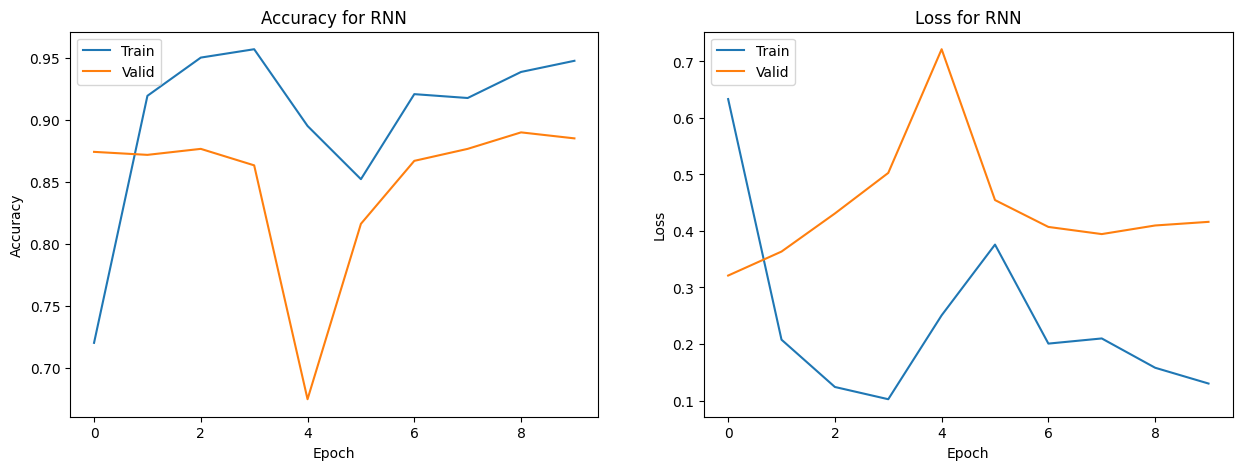

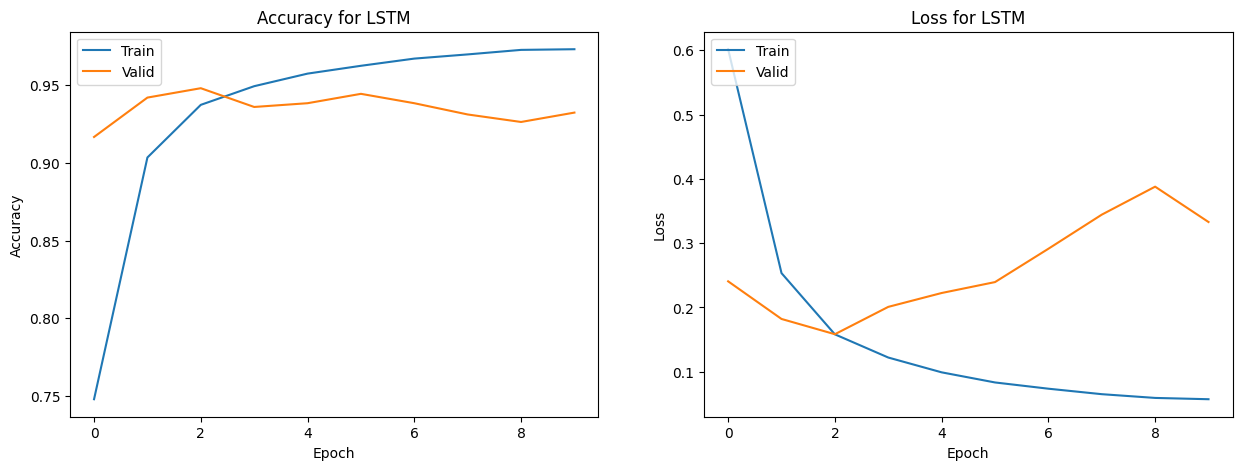

In [ ]:
import matplotlib.pyplot as plt


def plot_history(history, title=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title(f'Accuracy {title}')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Train', 'Valid'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title(f'Loss {title}')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['Train', 'Valid'], loc='upper left')

    plt.show()

# Plot for RNN
plot_history(history_rnn, title="for RNN")

# Plot for LSTM
plot_history(history_lstm, title="for LSTM")